## Titanic การวิเคราะห์ข้อมูล

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ลบ column ที่ไม่ต้องการทิ้งไป เช่น PassengerId

In [3]:
data.drop('PassengerId', axis=1, inplace=True)

In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


### แสดงข้อมูลแยกตามเพศ

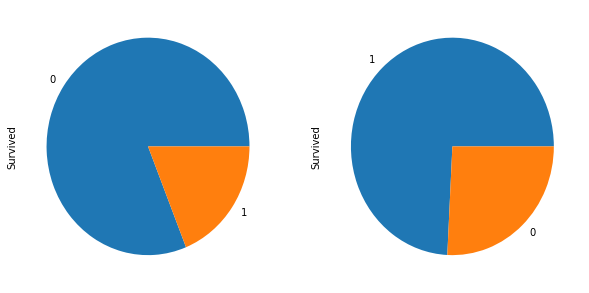

In [6]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
data.Survived[data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
data.Survived[data['Sex'] == 'female'].value_counts().plot(kind='pie')

### ทำการแปลงข้อมูล Sex  
1 = male
0 = female

In [7]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


### ข้อมูล Age มี missing value
จะทำการ replace ค่าของอายุเป็นเท่าไร ?

In [8]:
data['Age'].fillna(-1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### ปัญหาคือ จะแทนค่าของ Age ที่เป็น -1 ด้วยค่าอะไรดี ?
จากข้อมูลที่ให้มา ใน column Name จะมีคำนำหน้าชื่อ ซึ่งอยู่ในตำแหน่งที่ 2
น่าจะนำมาคำนวณหาค่าเฉลี่ยของ Age ได้หรือไม่ ?
มาลองดูกัน

In [9]:
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
prefixes = data['Name'].unique()
prefixes

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [10]:
medians = dict()
for prefix in prefixes:
    median = data.Age[(data["Age"] != -1) & (data['Name'] == prefix)].median()
    medians[prefix] = median
    
for index, row in data.iterrows():
    if row['Age'] == -1:
        data.loc[index, 'Age'] = medians[row['Name']]

data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S
5,0,3,Mr,1,30.0,0,0,330877,8.4583,NaN,Q
6,0,1,Mr,1,54.0,0,0,17463,51.8625,E46,S
7,0,3,Master,1,2.0,3,1,349909,21.0750,NaN,S
8,1,3,Mrs,0,27.0,0,2,347742,11.1333,NaN,S
9,1,2,Mrs,0,14.0,1,0,237736,30.0708,NaN,C


ทำการแสดงกราฟของแต่ละ prefix มามีอัตราการรอดชีวิตอย่างไร ?

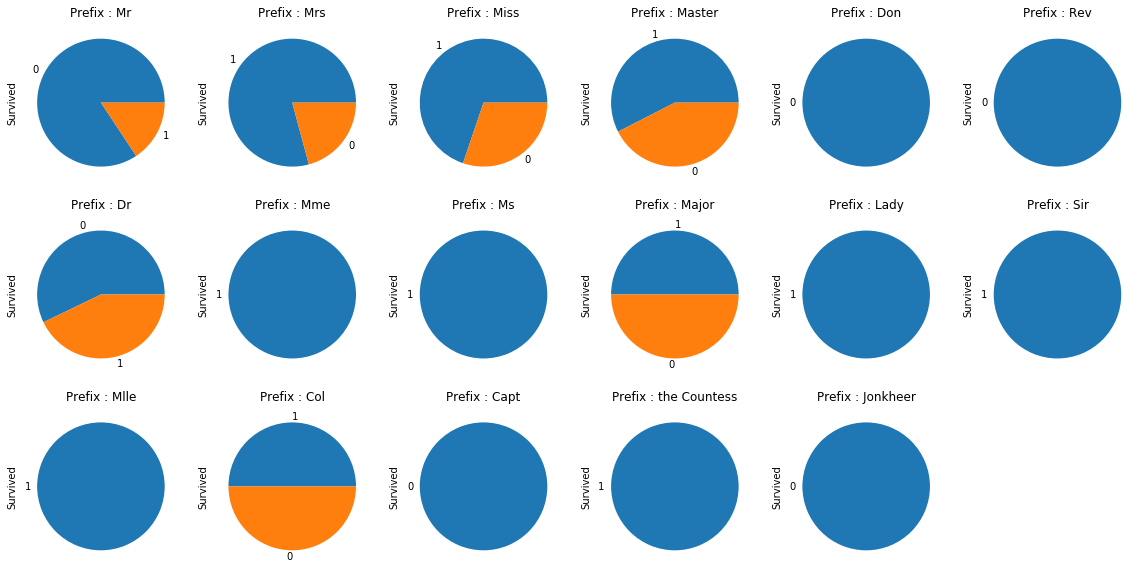

In [11]:
fig = plt.figure(figsize=(20,10))

index=1
for title in data['Name'].unique():
    fig.add_subplot(3, 6, index)
    plt.title('Prefix : {}'.format(title))
    data.Survived[data['Name'] == title].value_counts().plot(kind='pie')
    index += 1

In [12]:
from sklearn.preprocessing import StandardScaler
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,-0.557420,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,0.649410,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,-0.255712,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,0.423129,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,0.423129,0,0,373450,8.0500,NaN,S
5,0,3,Mr,1,0.045995,0,0,330877,8.4583,NaN,Q
6,0,1,Mr,1,1.856240,0,0,17463,51.8625,E46,S
7,0,3,Master,1,-2.065957,3,1,349909,21.0750,NaN,S
8,1,3,Mrs,0,-0.180285,0,2,347742,11.1333,NaN,S
9,1,2,Mrs,0,-1.160835,1,0,237736,30.0708,NaN,C


In [13]:
data['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Sir               1
Lady              1
Jonkheer          1
Ms                1
Don               1
Capt              1
the Countess      1
Name: Name, dtype: int64

In [14]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

data['Name'] = data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1.537975,0,0.649410,1,0,PC 17599,71.2833,C85,C
2,1,3,1.070922,0,-0.255712,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1.537975,0,0.423129,1,0,113803,53.1000,C123,S
4,0,3,-0.797294,1,0.423129,0,0,373450,8.0500,NaN,S
5,0,3,-0.797294,1,0.045995,0,0,330877,8.4583,NaN,Q
6,0,1,-0.797294,1,1.856240,0,0,17463,51.8625,E46,S
7,0,3,0.603868,1,-2.065957,3,1,349909,21.0750,NaN,S
8,1,3,1.537975,0,-0.180285,0,2,347742,11.1333,NaN,S
9,1,2,1.537975,0,-1.160835,1,0,237736,30.0708,NaN,C


### Ticket class

In [15]:
data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in data['Pclass'].unique():
    median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in data.iterrows():
    if row['Fare'] == -1:
        data.loc[index, 'Fare'] = medians[row['Pclass']]
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,0,A/5 21171,-0.502445,NaN,S
1,1,1,1.537975,0,0.649410,1,0,PC 17599,0.786845,C85,C
2,1,3,1.070922,0,-0.255712,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,1,1,1.537975,0,0.423129,1,0,113803,0.420730,C123,S
4,0,3,-0.797294,1,0.423129,0,0,373450,-0.486337,NaN,S
5,0,3,-0.797294,1,0.045995,0,0,330877,-0.478116,NaN,Q
6,0,1,-0.797294,1,1.856240,0,0,17463,0.395814,E46,S
7,0,3,0.603868,1,-2.065957,3,1,349909,-0.224083,NaN,S
8,1,3,1.537975,0,-0.180285,0,2,347742,-0.424256,NaN,S
9,1,2,1.537975,0,-1.160835,1,0,237736,-0.042956,NaN,C


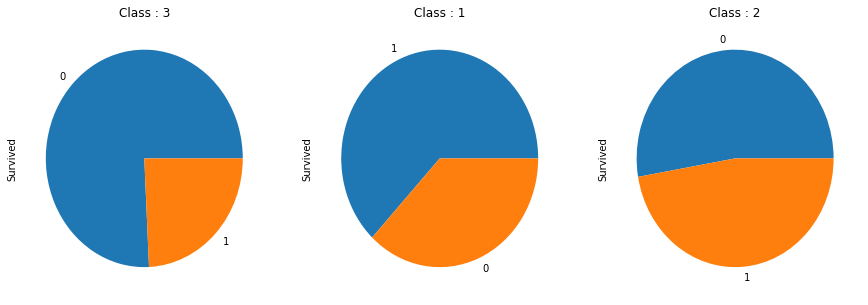

In [16]:
fig = plt.figure(figsize=(15,5))

index=1
for pclass in data['Pclass'].unique():
    fig.add_subplot(1, 3, index)
    plt.title('Class : {}'.format(pclass))
    data.Survived[data['Pclass'] == pclass].value_counts().plot(kind='pie')
    index += 1

In [17]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1,0,A/5 21171,-0.502445,NaN,S
1,1,-1.566107,1.537975,0,0.649410,1,0,PC 17599,0.786845,C85,C
2,1,0.827377,1.070922,0,-0.255712,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,1,-1.566107,1.537975,0,0.423129,1,0,113803,0.420730,C123,S
4,0,0.827377,-0.797294,1,0.423129,0,0,373450,-0.486337,NaN,S
5,0,0.827377,-0.797294,1,0.045995,0,0,330877,-0.478116,NaN,Q
6,0,-1.566107,-0.797294,1,1.856240,0,0,17463,0.395814,E46,S
7,0,0.827377,0.603868,1,-2.065957,3,1,349909,-0.224083,NaN,S
8,1,0.827377,1.537975,0,-0.180285,0,2,347742,-0.424256,NaN,S
9,1,-0.369365,1.537975,0,-1.160835,1,0,237736,-0.042956,NaN,C


In [18]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

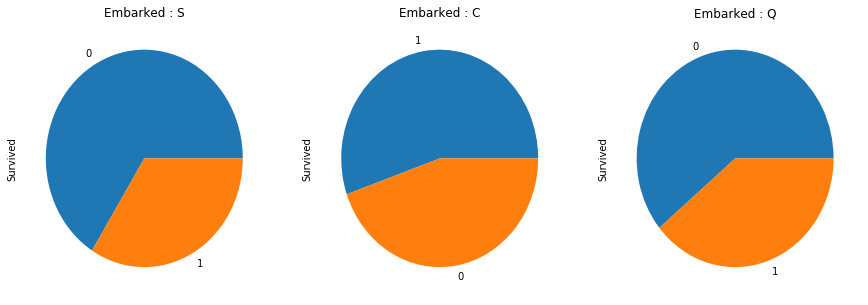

In [19]:
data['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,5))
index = 1
for embarked in data['Embarked'].unique():
    fig.add_subplot(1, 3, index)
    plt.title('Embarked : {}'.format(embarked))
    data.Survived[data['Embarked'] == embarked].value_counts().plot(kind='pie')
    index += 1

In [20]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1,0,A/5 21171,-0.502445,NaN,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1,0,PC 17599,0.786845,C85,1.942303
2,1,0.827377,1.070922,0,-0.255712,0,0,STON/O2. 3101282,-0.488854,NaN,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1,0,113803,0.420730,C123,-0.585954
4,0,0.827377,-0.797294,1,0.423129,0,0,373450,-0.486337,NaN,-0.585954
5,0,0.827377,-0.797294,1,0.045995,0,0,330877,-0.478116,NaN,0.678175
6,0,-1.566107,-0.797294,1,1.856240,0,0,17463,0.395814,E46,-0.585954
7,0,0.827377,0.603868,1,-2.065957,3,1,349909,-0.224083,NaN,-0.585954
8,1,0.827377,1.537975,0,-0.180285,0,2,347742,-0.424256,NaN,-0.585954
9,1,-0.369365,1.537975,0,-1.160835,1,0,237736,-0.042956,NaN,1.942303


In [21]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

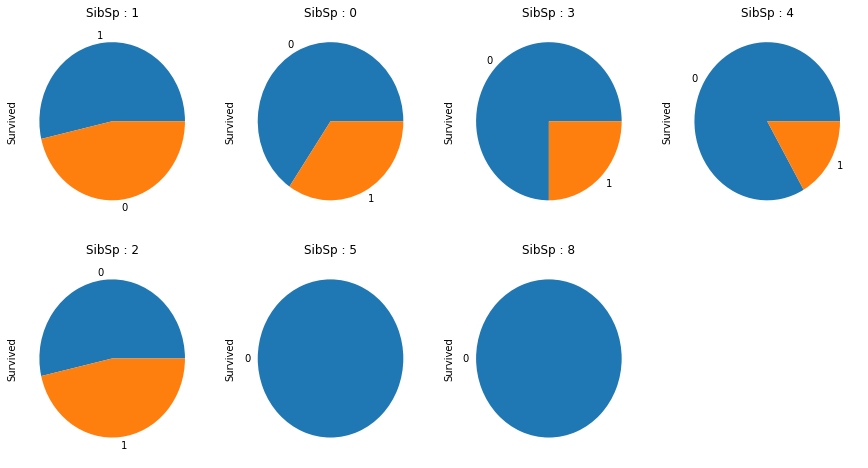

In [22]:
fig = plt.figure(figsize=(15,8))

index = 1
for sibsp in data['SibSp'].unique():
    fig.add_subplot(2, 4, index)
    plt.title('SibSp : {}'.format(sibsp))
    data.Survived[data['SibSp'] == sibsp].value_counts().plot(kind='pie')
    index += 1

In [23]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data['SibSp'] = data['SibSp'].apply(lambda x: replacement.get(x))
data['SibSp'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,0,A/5 21171,-0.502445,NaN,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,0,PC 17599,0.786845,C85,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,0,STON/O2. 3101282,-0.488854,NaN,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,0,113803,0.420730,C123,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,0,373450,-0.486337,NaN,-0.585954
5,0,0.827377,-0.797294,1,0.045995,-0.396241,0,330877,-0.478116,NaN,0.678175
6,0,-1.566107,-0.797294,1,1.856240,-0.396241,0,17463,0.395814,E46,-0.585954
7,0,0.827377,0.603868,1,-2.065957,-1.382416,1,349909,-0.224083,NaN,-0.585954
8,1,0.827377,1.537975,0,-0.180285,-0.396241,2,347742,-0.424256,NaN,-0.585954
9,1,-0.369365,1.537975,0,-1.160835,1.576109,0,237736,-0.042956,NaN,1.942303


In [24]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

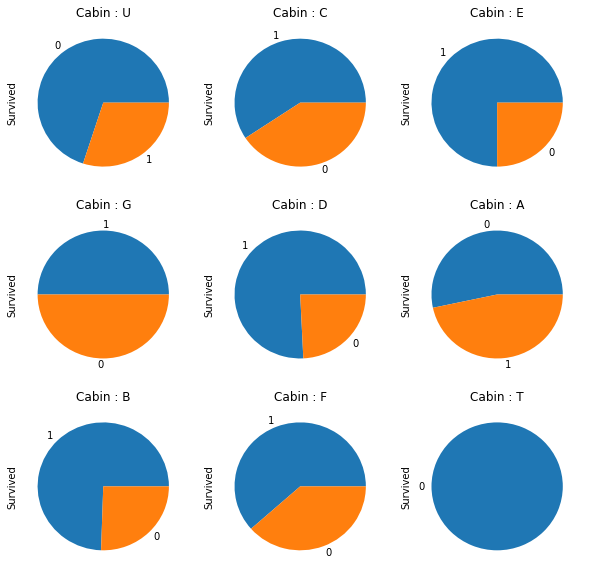

In [25]:
fig = plt.figure(figsize=(10,10))

index = 1
for cabin in data['Cabin'].unique():
    fig.add_subplot(3, 3, index)
    plt.title('Cabin : {}'.format(cabin))
    data.Survived[data['Cabin'] == cabin].value_counts().plot(kind='pie')
    index += 1

In [26]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,0,A/5 21171,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,0,PC 17599,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,0,STON/O2. 3101282,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,0,113803,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,0,373450,-0.486337,-0.494813,-0.585954
5,0,0.827377,-0.797294,1,0.045995,-0.396241,0,330877,-0.478116,-0.494813,0.678175
6,0,-1.566107,-0.797294,1,1.856240,-0.396241,0,17463,0.395814,2.415274,-0.585954
7,0,0.827377,0.603868,1,-2.065957,-1.382416,1,349909,-0.224083,-0.494813,-0.585954
8,1,0.827377,1.537975,0,-0.180285,-0.396241,2,347742,-0.424256,-0.494813,-0.585954
9,1,-0.369365,1.537975,0,-1.160835,1.576109,0,237736,-0.042956,-0.494813,1.942303


In [27]:
data.drop('Ticket', axis=1, inplace=True)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,0,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,0,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,0,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,0,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,0,-0.486337,-0.494813,-0.585954
5,0,0.827377,-0.797294,1,0.045995,-0.396241,0,-0.478116,-0.494813,0.678175
6,0,-1.566107,-0.797294,1,1.856240,-0.396241,0,0.395814,2.415274,-0.585954
7,0,0.827377,0.603868,1,-2.065957,-1.382416,1,-0.224083,-0.494813,-0.585954
8,1,0.827377,1.537975,0,-0.180285,-0.396241,2,-0.424256,-0.494813,-0.585954
9,1,-0.369365,1.537975,0,-1.160835,1.576109,0,-0.042956,-0.494813,1.942303


In [28]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

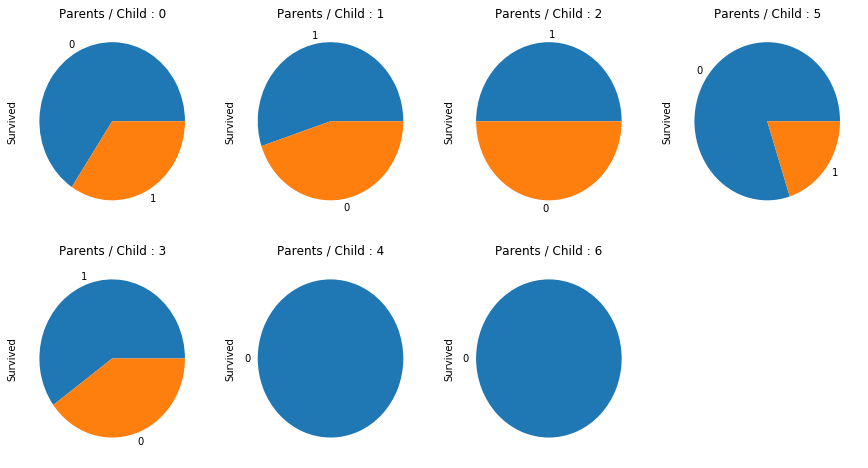

In [29]:
fig = plt.figure(figsize=(15,8))

index = 1
for parch in data['Parch'].unique():
    fig.add_subplot(2, 4, index)
    plt.title('Parents / Child : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    index += 1

In [30]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))
data.head(10)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,-0.468807,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954
5,0,0.827377,-0.797294,1,0.045995,-0.396241,-0.468807,-0.478116,-0.494813,0.678175
6,0,-1.566107,-0.797294,1,1.856240,-0.396241,-0.468807,0.395814,2.415274,-0.585954
7,0,0.827377,0.603868,1,-2.065957,-1.382416,2.174907,-0.224083,-0.494813,-0.585954
8,1,0.827377,1.537975,0,-0.180285,-0.396241,0.853050,-0.424256,-0.494813,-0.585954
9,1,-0.369365,1.537975,0,-1.160835,1.576109,-0.468807,-0.042956,-0.494813,1.942303


In [31]:
from sklearn.model_selection import train_test_split
survived = data['Survived']
data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=42)

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.793296089385
0.810055865922
0.77094972067
0.810055865922
0.821229050279
0.832402234637
0.821229050279
0.787709497207
0.754189944134


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [46]:
testing_data = pd.read_csv('test.csv')

In [47]:
index = 1
for model in models:
    model.fit(data, survived)
    prediction = model.predict(testing_data)
    np.savetxt('submission{}.csv'.format(index), prediction, delimiter=",")
    index += 1

ValueError: could not convert string to float: 'C'